## Example of EDA for regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



from sklearn.decomposition import PCA
import seaborn as sns

def plot_pca(df, n_components=2, figsize=(10, 8), random_state=42, c='k'):
    """
    Perform PCA on a pandas DataFrame and plot the results.
    
    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame containing the rescaled numerical features
    n_components : int, optional
        Number of principal components to compute (default: 2)
    figsize : tuple, optional
        Figure size for the plot (default: (10, 8))
    random_state : int, optional
        Random state for reproducibility (default: 42)
    """
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=['float64', 'int64'])
    
    # Perform PCA
    pca = PCA(n_components=n_components, random_state=random_state)
    principal_components = pca.fit_transform(numeric_df)
    
    # Create a DataFrame with the principal components
    pc_df = pd.DataFrame(
        data=principal_components,
        columns=[f'PC{i+1}' for i in range(n_components)]
    )
    
    # Calculate explained variance
    explained_variance = pca.explained_variance_ratio_ * 100
    
    # Create the plot
    plt.figure(figsize=figsize)
    
    # Scatter plot of the first two PCs
    if n_components >= 2:
        sns.scatterplot(x='PC1', y='PC2', data=pc_df, c=c)
        
        plt.xlabel(f'PC1 ({explained_variance[0]:.2f}%)')
        plt.ylabel(f'PC2 ({explained_variance[1]:.2f}%)')
        plt.title('PCA of Rescaled Features')
        
        # Add a tight grid
        plt.grid(True, linestyle='--', alpha=0.7)
        
    # Show the plot
    plt.tight_layout()
    plt.show()
    
    # Print explained variance information
    print(f'Total explained variance: {sum(explained_variance):.2f}%')
    for i, variance in enumerate(explained_variance):
        print(f'PC{i+1}: {variance:.2f}%')
    
    return pca, pc_df

In [ ]:
###IMPORT DATA

import os
os.chdir('/Users/chris/Notes/masters/BigDataAnalytics/Lab/eda4')
#!kaggle datasets download -d aishwaryamuthukumar/cars-dataset-audi-bmw-ford-hyundai-skoda-vw
#!unzip cars-dataset-audi-bmw-ford-hyundai-skoda-vw.zip


Archive:  cars-dataset-audi-bmw-ford-hyundai-skoda-vw.zip
  inflating: cars_dataset.csv        


In [3]:
df=pd.read_csv('cars_dataset.csv')
df_audi=df.loc[df['Make']=='audi']

In [4]:
print('Let us print some info about the dataset')
df_audi.info()

Let us print some info about the dataset
<class 'pandas.core.frame.DataFrame'>
Index: 10668 entries, 0 to 10667
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  float64
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
 9   Make          10668 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 916.8+ KB


In [5]:
print('Apparently there are no missing values')
df.isna().sum()

Apparently there are no missing values


model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Make            0
dtype: int64

In [6]:
print('however, looking at the description of the numerical attributes we see that the engine size minimum has a problem')
df_audi.describe()

however, looking at the description of the numerical attributes we see that the engine size minimum has a problem


,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [7]:
##remove a clear outlier/problematic value
df_audi=df_audi.loc[df_audi['engineSize']>0,:]

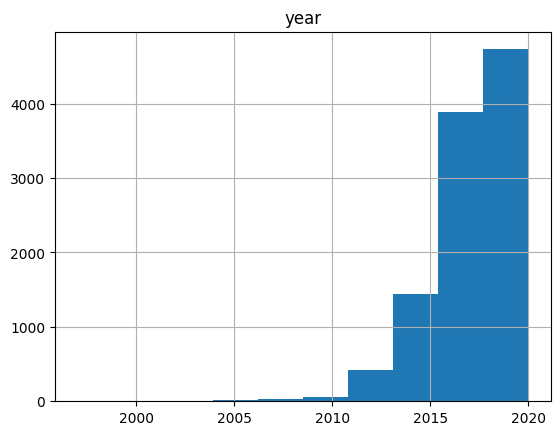

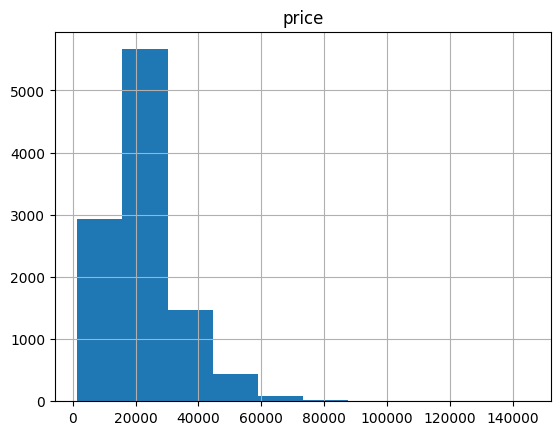

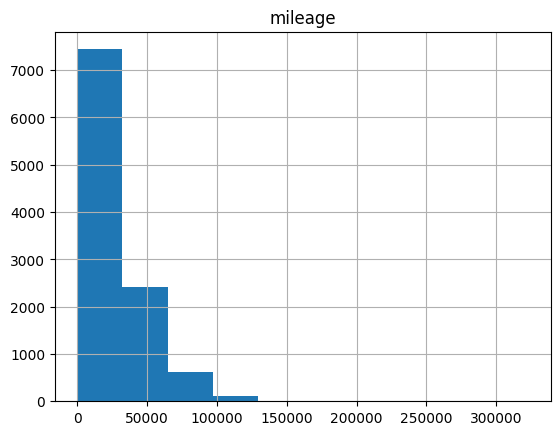

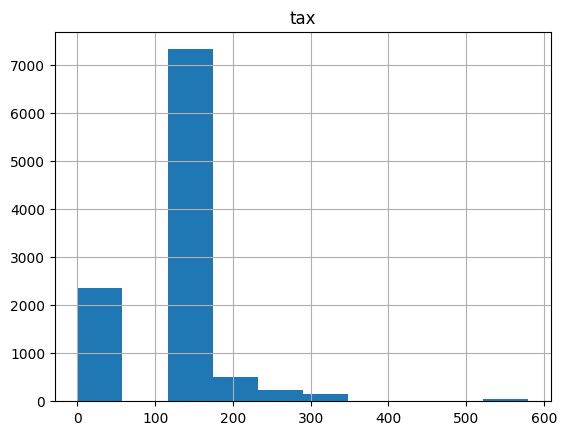

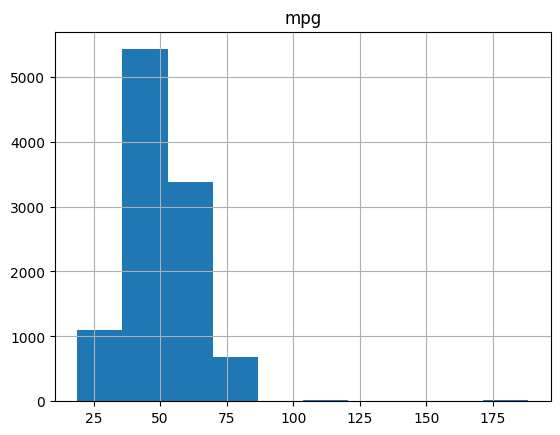

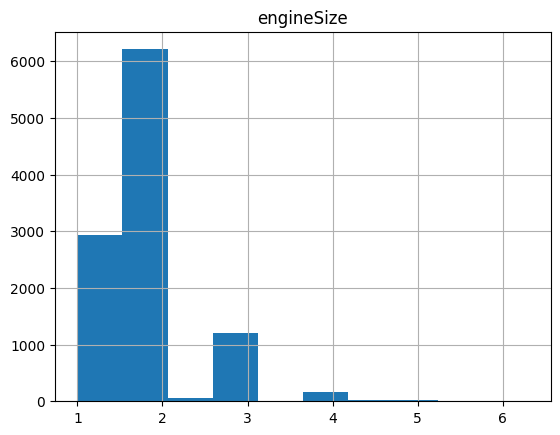

In [8]:
## plot distribution
for column in df_audi.columns:
  if df_audi[column].dtypes in ['int64','float64']:
    df_audi[column].hist()
    plt.title(column)
    plt.show()

## Centrality measures

In [9]:
for col in ['year', 'price', 'mileage',  'tax', 'mpg', 'engineSize']: 
    print(f'Feature {col}: median {df_audi[col].median()}, IQR: [{df_audi[col].quantile(0.25)},{df_audi[col].quantile(0.75)}]')
for col in ['model',  'transmission', 'fuelType']: 
    print(f'Feature {col}: mode {df_audi[col].mode()[0]}, no dispersion measure as it is nominal')

Feature year: median 2017.0, IQR: [2016.0,2019.0]
Feature price: median 20000.0, IQR: [15000.0,27990.0]
Feature mileage: median 19118.0, IQR: [6000.0,36547.0]
Feature tax: median 145.0, IQR: [125.0,145.0]
Feature mpg: median 49.6, IQR: [40.9,58.9]
Feature engineSize: median 2.0, IQR: [1.5,2.0]
Feature model: mode  A3, no dispersion measure as it is nominal
Feature transmission: mode Manual, no dispersion measure as it is nominal
Feature fuelType: mode Diesel, no dispersion measure as it is nominal


## Exploratory data analysis

<Figure size 1500x500 with 0 Axes>

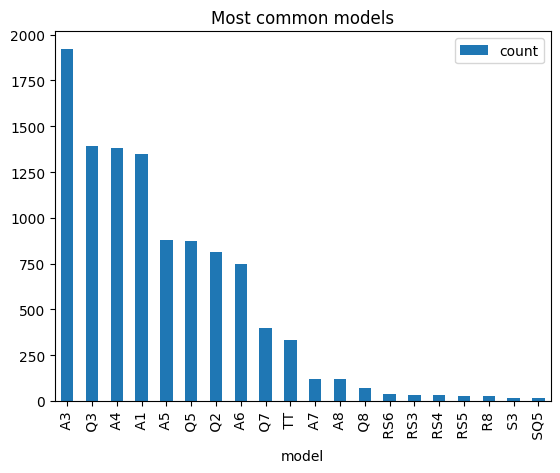

In [38]:
### LET'S DO A LITTLE OF EDA
## inspect car model 
m = df_audi["model"].value_counts().reset_index().head(20) # 20 modelli più frequenti 
plt.figure(figsize=(15,5))
m.plot(kind='bar',x="model",y="count")
plt.title("Most common models")
plt.show()

<Figure size 1500x500 with 0 Axes>

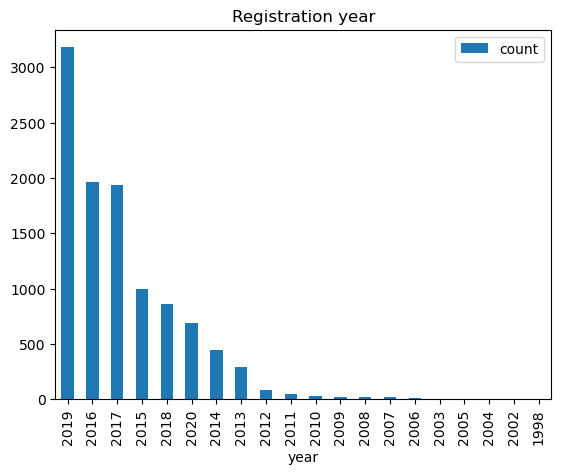

In [96]:
## inspect registration year variable
m = df_audi["year"].value_counts().reset_index().head(20)
plt.figure(figsize=(15,5))
m.plot(kind='bar',x="year",y="count")
plt.title("Registration year")
plt.show()

In [30]:
df_audi_cut=df_audi.loc[df_audi['year']>2010] # auto immatricolate dopo 2010
grouped_data = df_audi_cut.groupby(["year", "transmission"]).size().unstack(fill_value=0)
grouped_data

transmission,Automatic,Manual,Semi-Auto
year,,,
2011,15,31,1
2012,25,56,4
2013,61,172,58
2014,97,239,110
2015,204,562,232
2016,316,1100,544
2017,323,930,679
2018,193,286,385
2019,1266,765,1150


<Figure size 2000x1000 with 0 Axes>

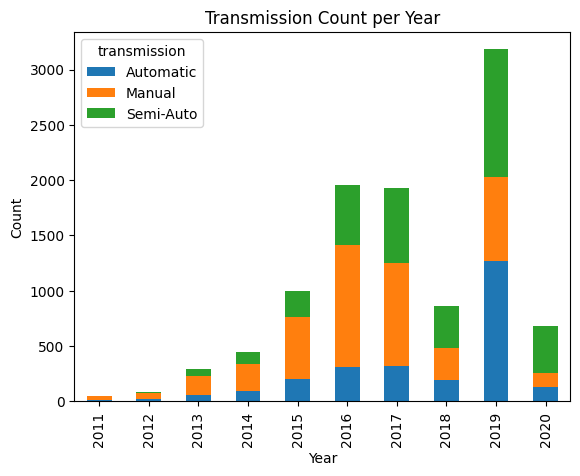

In [31]:
## inspect distribution of transmission variable per year

plt.figure(figsize=(20,10))
df_audi_cut=df_audi.loc[df_audi['year']>2010] # auto immatricolate dopo 2010
grouped_data = df_audi_cut.groupby(["year", "transmission"]).size().unstack(fill_value=0)
'''
groupby.size() - conta numero di auto in ogni combinazione year-transmission
year    automatic   manual  semi
2012	25	        56	    4
2013	61	        172	    58
(...)
'''
# Plot the count for each transmission category by year
grouped_data.plot(kind="bar", stacked=True)

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Transmission Count per Year")
plt.show()

<Figure size 2000x1000 with 0 Axes>

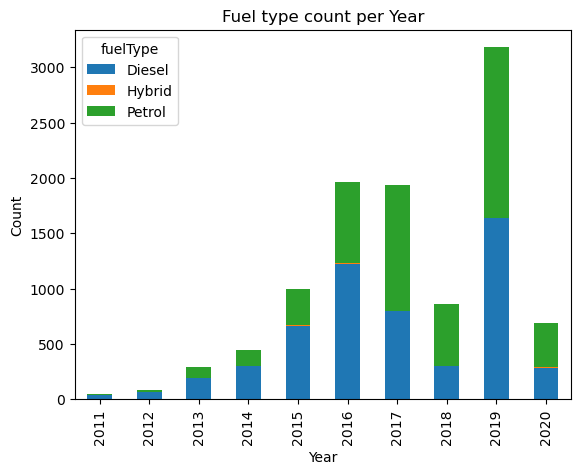

In [98]:
## inspect distribution of fuel type variable per year

plt.figure(figsize=(20,10))
df_audi_cut=df_audi.loc[df_audi['year']>2010]
grouped_data = df_audi_cut.groupby(["year", "fuelType"]).size().unstack(fill_value=0)

# Plot the count for each transmission category by year
grouped_data.plot(kind="bar", stacked=True)

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Fuel type count per Year")
plt.show()

16 models have at least 30 observations. Plotting their boxplot.


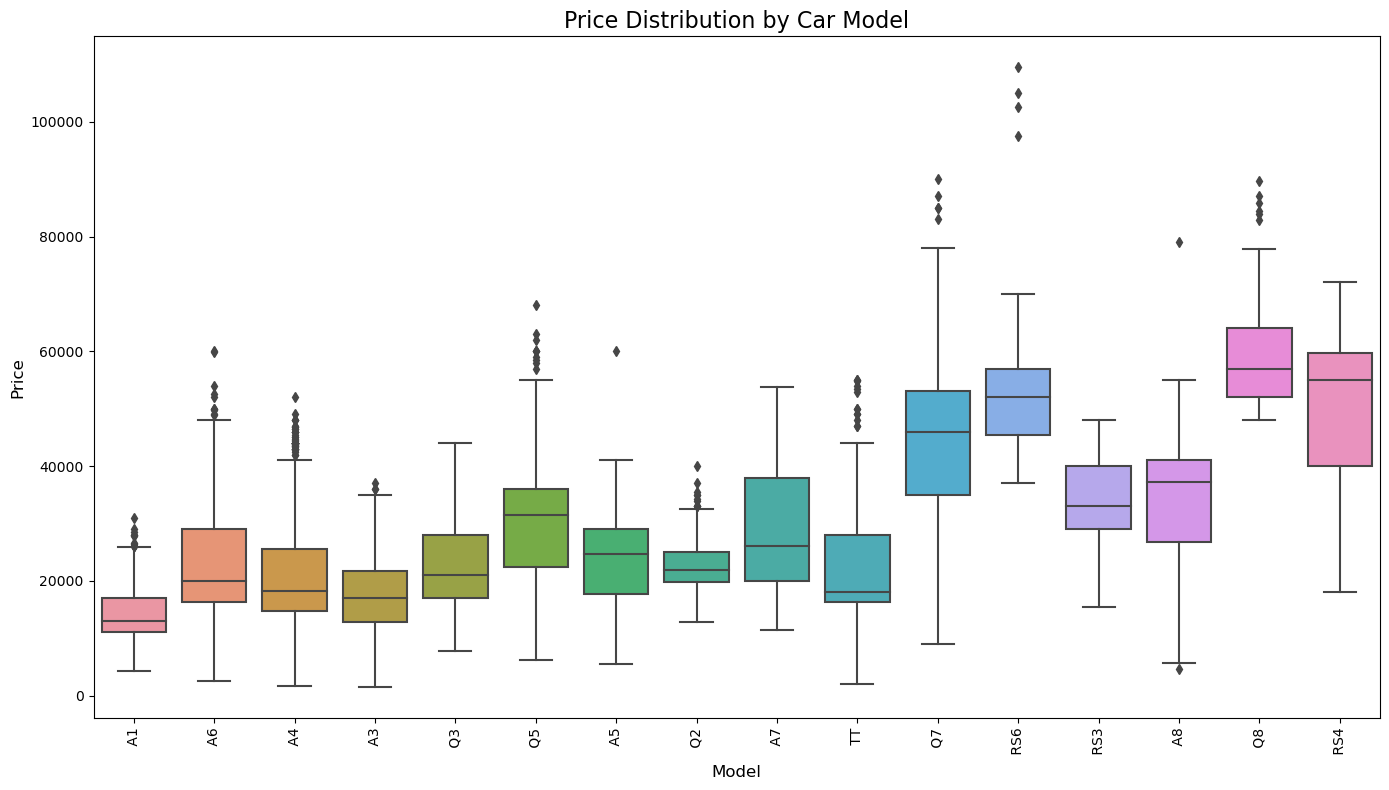

/var/folders/81/kn1rwxy912vgf5sqnk7n_zd80000gn/T/ipykernel_27831/2623555182.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['log_price']=np.log10(df_filtered['price'])


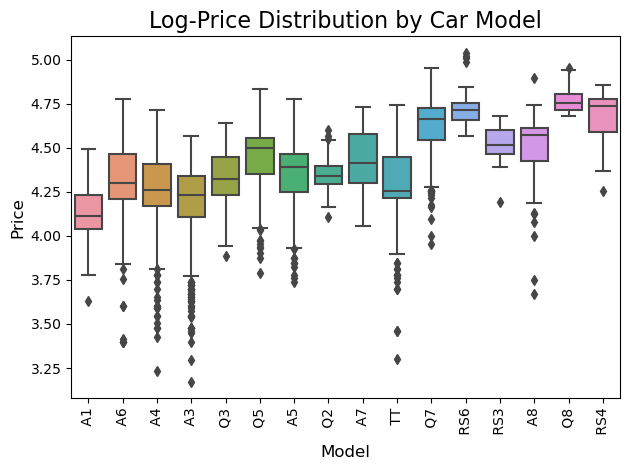

As it is easy to see the logarithm is too much for price... getting negatively skewed distributions. 
It already suggest me that I should use BoxCox transformation later.


In [99]:
import seaborn as sns
min_count=30


# Set the figure size for better visibility
plt.figure(figsize=(14, 8))
model_counts = df_audi['model'].value_counts()
# Filter models that appear more than min_count times
frequent_models = model_counts[model_counts >= min_count].index.tolist()
# Create a filtered dataframe with only these frequent models
df_filtered = df_audi[df_audi['model'].isin(frequent_models)]
# Get the count of models that meet the criteria


print(f'{len(frequent_models)} models have at least {min_count} observations. Plotting their boxplot.')

# Create the boxplot using seaborn
ax = sns.boxplot(x='model', y='price', data=df_filtered)

# Improve readability by rotating x-axis labels
plt.xticks(rotation=90)

# Add title and labels
plt.title('Price Distribution by Car Model', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# trasformazione logaritmica del prezzo
df_filtered['log_price']=np.log10(df_filtered['price'])

# Create the boxplot using seaborn
ax = sns.boxplot(x='model', y='log_price', data=df_filtered)

# Improve readability by rotating x-axis labels
plt.xticks(rotation=90)

# Add title and labels
plt.title('Log-Price Distribution by Car Model', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


print('As it is easy to see the logarithm is too much for price... getting negatively skewed distributions. \nIt already suggest me that I should use BoxCox transformation later.')



[]

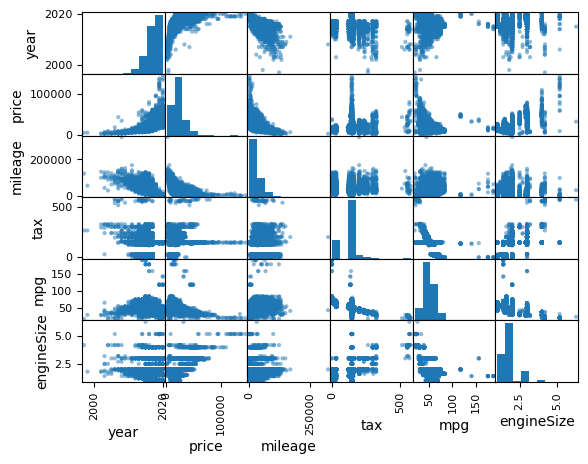

In [100]:
# inspect scatterplots between continuous variables
# as you can see there are no linear correlations around... we will use spearman
pd.plotting.scatter_matrix(df_audi[['year', 'price', 'mileage','tax',
       'mpg', 'engineSize']])
plt.plot()

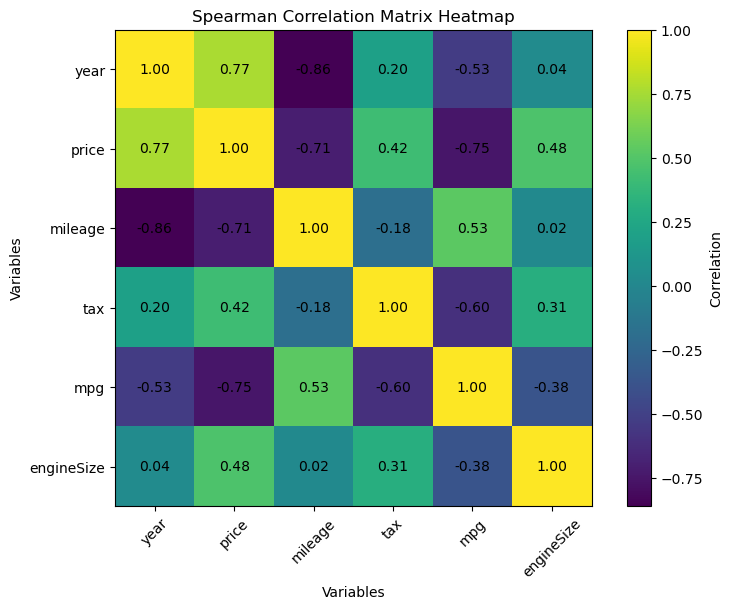

year, mileage and miles per gallon exhibit a strong correlation with the target


In [101]:
## Let us now think about numerical variables, do they correlate with the target (price)? Looking at the scatter plot
## using sperman correlation coefficient may be better
corr_spearman=df_audi[['year', 'price', 'mileage','tax',
       'mpg', 'engineSize']].corr(method='spearman')

## Plot correlation using a heatmap

plt.figure(figsize=(8, 6))
plt.imshow(corr_spearman, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.title('Spearman Correlation Matrix Heatmap')
# Annotate cells with correlation values
for i in range(len(corr_spearman)):
    for j in range(len(corr_spearman)):
        plt.text(j, i, f"{corr_spearman.iloc[i, j]:.2f}", ha='center', va='center', color='black')

plt.xticks(ticks=np.arange(len(corr_spearman.columns)), labels=corr_spearman.columns, rotation=45)
plt.yticks(ticks=np.arange(len(corr_spearman.columns)), labels=corr_spearman.columns)
plt.tight_layout()
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

print('year, mileage and miles per gallon exhibit a strong correlation with the target')

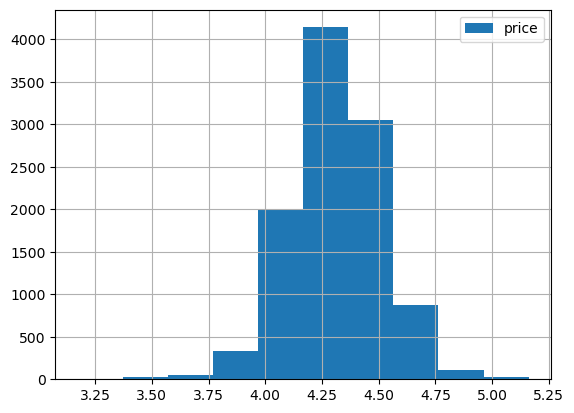

As we already saw, the log transformation may be too much. Moreover different vars have different balancing


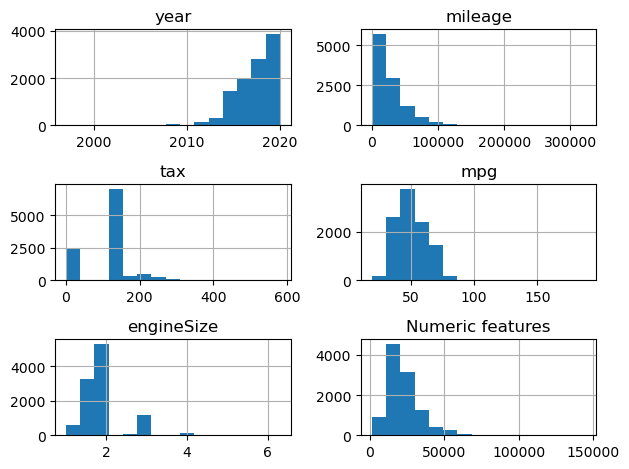

For this reason, we first use a box cox transformation. Afterward, as different vars span different orders of magnitude we standardize the values. 
Transform and rescale to make distribution similar and avoid units of measure effects 


In [115]:
# Now we need to think about outliers and study the numeric variables.
# Let us first look at the variable distributions

numeric_vars=['year', 'mileage', 'tax', 'mpg', 'engineSize', 'price']

np.log10(df_audi['price']).hist(label='price')
plt.legend()
plt.show()

print('As we already saw, the log transformation may be too much. Moreover different vars have different balancing')

df_audi[numeric_vars].hist(bins=15)
plt.title('Numeric features')
plt.tight_layout()
plt.show()


print('For this reason, we first use a box cox transformation. Afterward, as different vars span different orders of magnitude we standardize the values. ')
print('Transform and rescale to make distribution similar and avoid units of measure effects ')

/Users/veronicaguidetti/miniforge3/envs/PACS/lib/python3.11/site-packages/scipy/stats/_morestats.py:1153: UserWarning: The optimal lambda is 351.92339295654585, but the returned lambda is the constrained optimum to ensure that the maximum or the minimum of the transformed data does not overflow in <class 'numpy.float64'>.
  lmax = boxcox_normmax(x, method='mle', optimizer=optimizer)


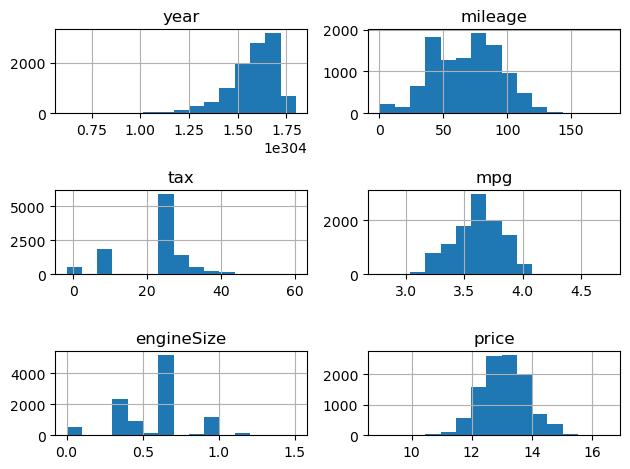

The outcome for price is terrible but we do not care at the moment. Let us now rescale the data


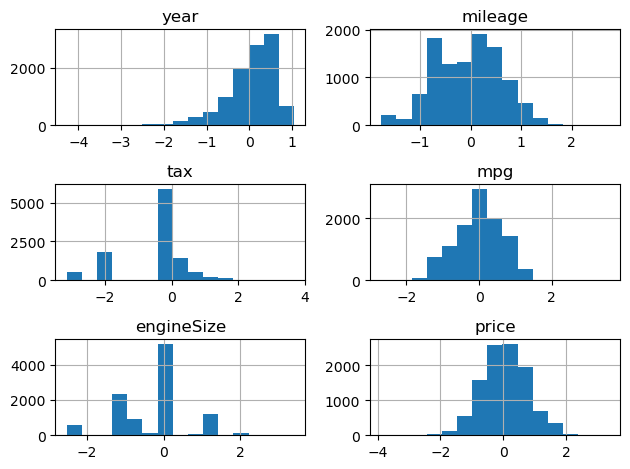

In [129]:
from scipy import stats

transformed_df = df_audi[numeric_vars].copy()
lambda_dict={}
# Apply Box-Cox transformation 
for col in numeric_vars:
    # Perform Box-Cox transformation
    min_val = transformed_df[col].min()
    if min_val<=0:
        shift=-min_val+1e-4
    else:
        shift=0
    new_values, lambda_val = stats.boxcox(transformed_df[col]+shift)

    lambda_dict[col]=lambda_val
    transformed_df[col] = new_values

transformed_df.hist(bins=15)
plt.tight_layout()
plt.show()

print('The outcome for price is terrible but we do not care at the moment. Let us now rescale the data')


# Apply RobustScaler transformation
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
transformed_real_cov = pd.DataFrame(scaler.fit_transform(transformed_df[numeric_vars]))
transformed_real_cov.columns=numeric_vars

transformed_real_cov['tax']=transformed_real_cov['tax']/4

transformed_real_cov.hist(bins=15)
plt.tight_layout()
plt.show()





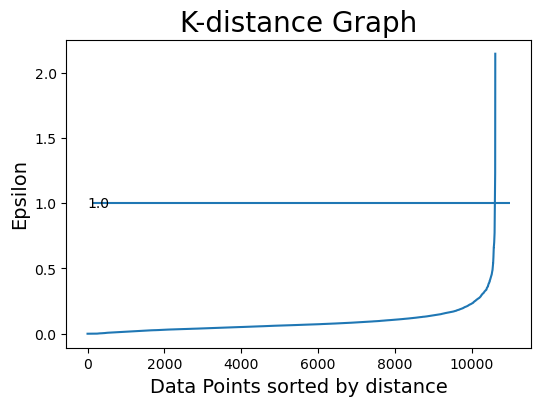

Value Counts:
-1: 90
0: 7623
1: 1811
2: 364
3: 373
4: 148
5: 29
6: 16
7: 94
8: 18
9: 15
10: 12
11: 18


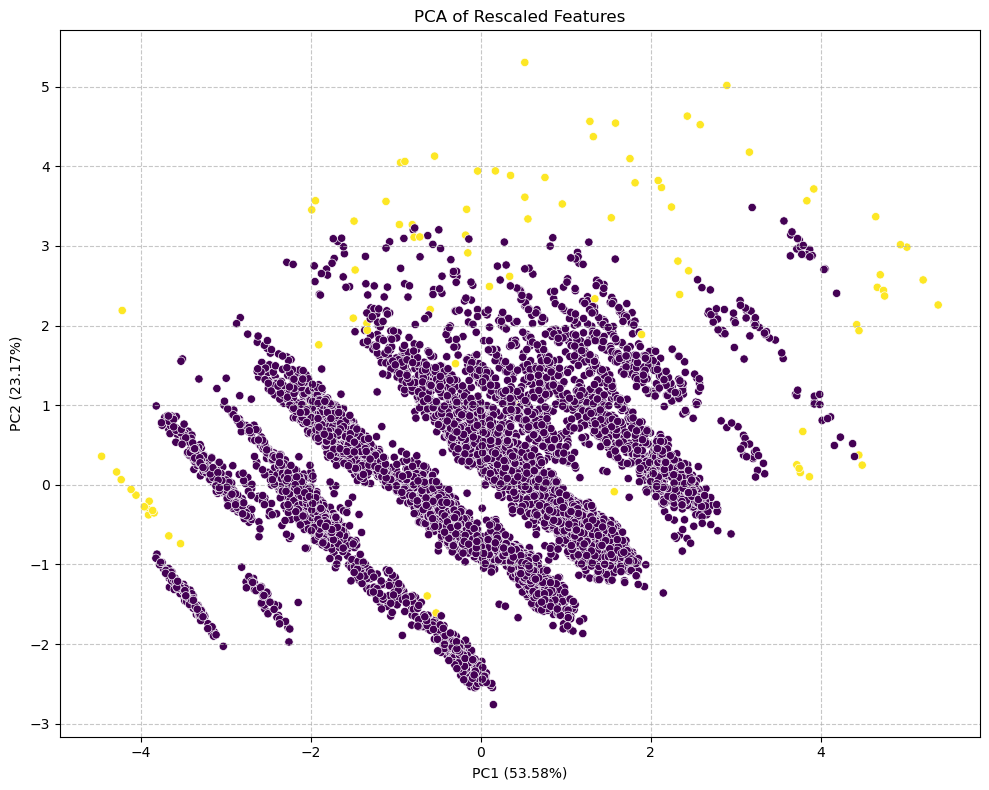

Total explained variance: 76.75%
PC1: 53.58%
PC2: 23.17%


In [141]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors


neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(transformed_real_cov)
distances, indices = nbrs.kneighbors(transformed_real_cov)
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,-1]
plt.figure(figsize=(6,4))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14,color='k')
plt.hlines(1.0,11000,125)
plt.text(0, 1., '1.0', ha ='left', va ='center')
plt.show()


min_samples=2*len(numeric_vars)
eps=0.8
model = DBSCAN(eps = eps, min_samples = min_samples).fit(transformed_real_cov)
labels = model.labels_
outliers_DBSCAN=(labels==-1).astype(int)


# Get unique values and their counts
unique_values, counts = np.unique(labels, return_counts=True)

# Create a dictionary to store the counts of each value
value_counts = dict(zip(unique_values, counts))

# Print the value counts
print("Value Counts:")
for value, count in value_counts.items():
    print(f"{value}: {count}")





plot_pca(transformed_real_cov, n_components=2, figsize=(10, 8), random_state=42, c=outliers_DBSCAN)
plt.show()

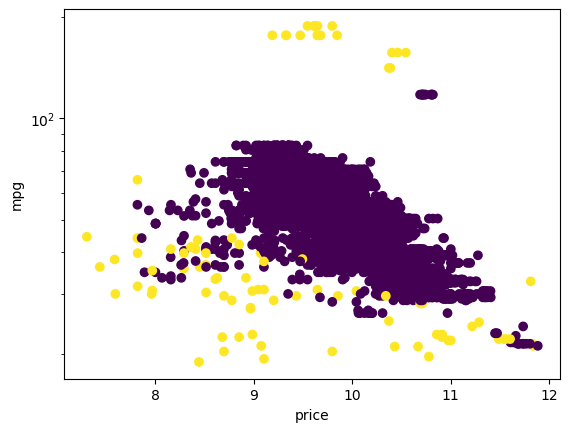

In [142]:
## let us look at the outliers in the original data distribution
plt.scatter(np.log(df_audi['price']),df_audi['mpg'],c=outliers_DBSCAN)
plt.yscale('log')
plt.xlabel('price')
plt.ylabel('mpg')
plt.show()



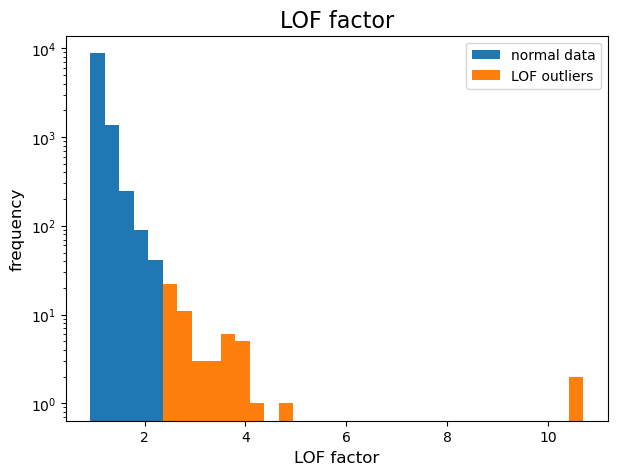

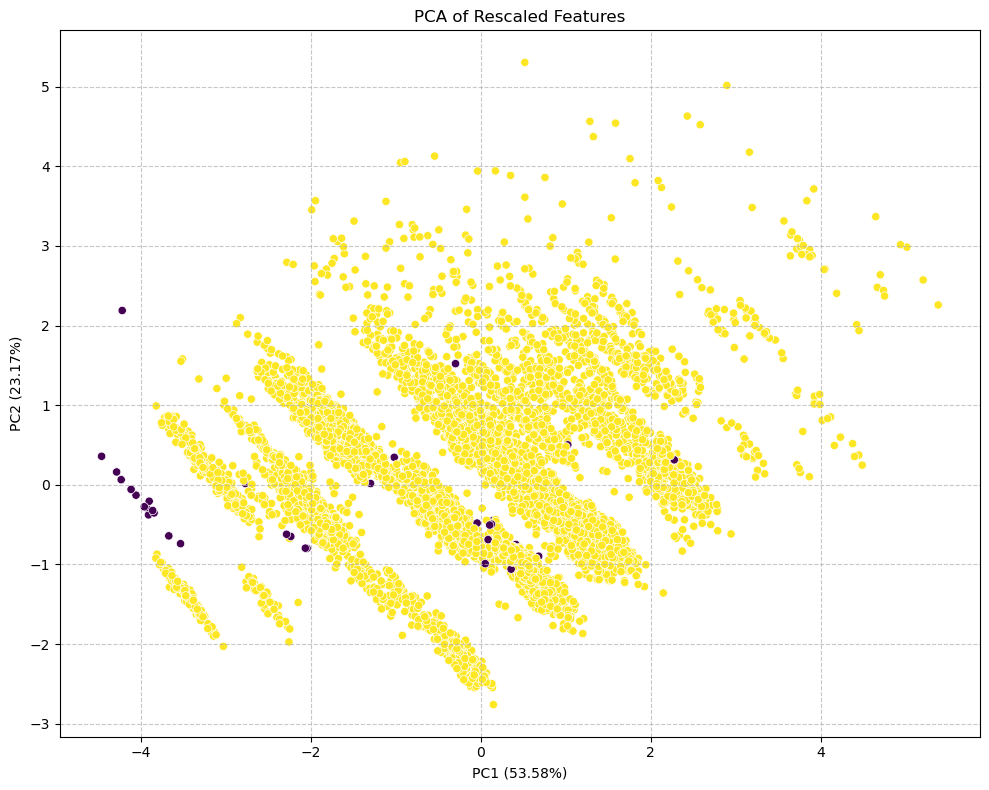

Total explained variance: 76.75%
PC1: 53.58%
PC2: 23.17%


In [153]:
from sklearn.neighbors import LocalOutlierFactor

# fit the model for outlier detection (default)
lof = LocalOutlierFactor(novelty=False,contamination=0.005)
labels = lof.fit_predict(transformed_real_cov)

#plot LOF scores
lof_scores=-lof.negative_outlier_factor_
plt.figure(figsize=(7,5))
plt.hist(lof_scores[labels>-1],bins=np.linspace(min(lof_scores), max(lof_scores), 35),label='normal data')
plt.hist(lof_scores[labels==-1],bins=np.linspace(min(lof_scores), max(lof_scores), 35),label='LOF outliers')
plt.xlabel('LOF factor',fontsize=12)
plt.ylabel('frequency',fontsize=12)
plt.title('LOF factor',fontsize=16)
plt.legend()
plt.yscale('log')
plt.show()



plot_pca(transformed_real_cov, n_components=2, figsize=(10, 8), random_state=42, c=labels)
plt.show()


54


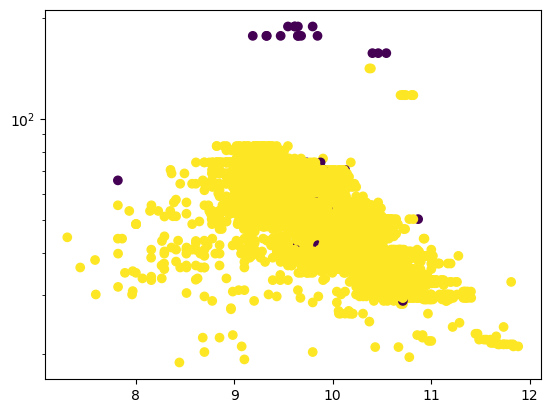

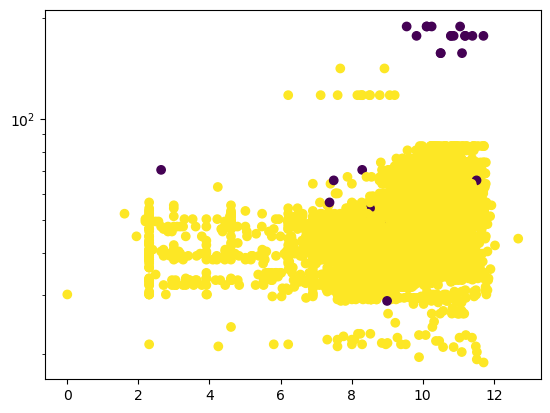

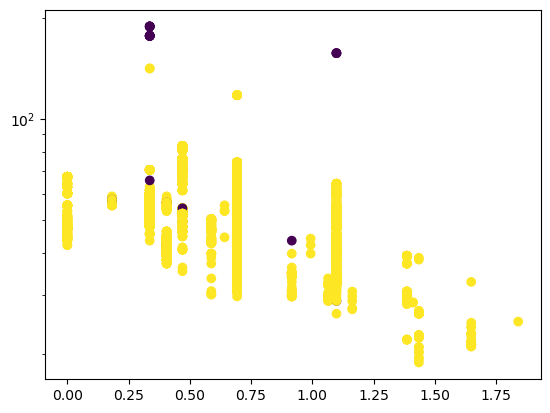

In [154]:
print((labels==-1).sum())

plt.scatter(np.log(df_audi['price']),df_audi['mpg'],c=labels)
plt.yscale('log')

plt.show()

plt.scatter(np.log(df_audi['mileage']),df_audi['mpg'],c=labels)
plt.yscale('log')
plt.show()

plt.scatter(np.log(df_audi['engineSize']),df_audi['mpg'],c=labels)
plt.yscale('log')
plt.show()

In [168]:
print('I BELIEVE THAT DBSCAN RESULTS ARE MORE CONVINCING IN THIS CASE. LET US REMOVE THE OUTLIERS FROM THE ORIGINAL DATASET AND PROCEED WITH THE ANALYSIS')
df_audi_no_outliers=df_audi.loc[ (1-outliers_DBSCAN).astype(bool)]
df_audi_no_outliers.head()

I BELIEVE THAT DBSCAN RESULTS ARE MORE CONVINCING IN THIS CASE. LET US REMOVE THE OUTLIERS FROM THE ORIGINAL DATASET AND PROCEED WITH THE ANALYSIS


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi


As we aim to predict car price using a linear regression model, we need to inspect the dataset so to understand whether variable distribution is suited for the task


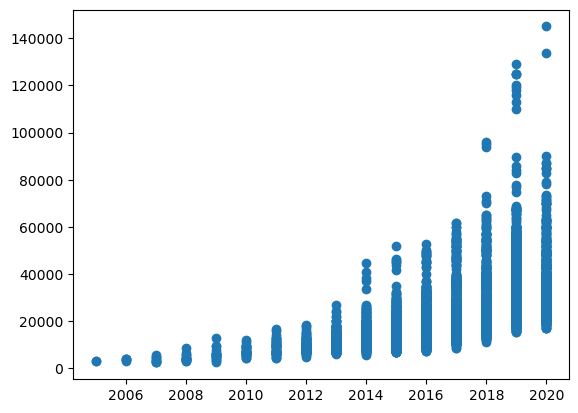

try to apply log transformation. As it does not depend on ANY parameter, it can be applied to both the training and test set.


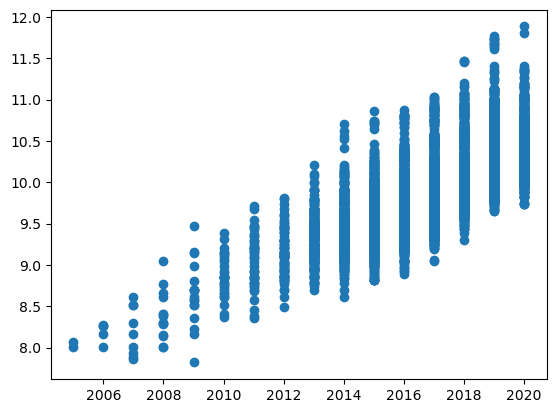

In [169]:
print('As we aim to predict car price using a linear regression model, we need to inspect the dataset so to understand whether variable distribution is suited for the task')

plt.scatter(df_audi_no_outliers['year'],df_audi_no_outliers['price'])
plt.show()

print('try to apply log transformation. As it does not depend on ANY parameter, it can be applied to both the training and test set.')
plt.scatter(df_audi_no_outliers['year'],np.log(df_audi_no_outliers['price']))
plt.show()

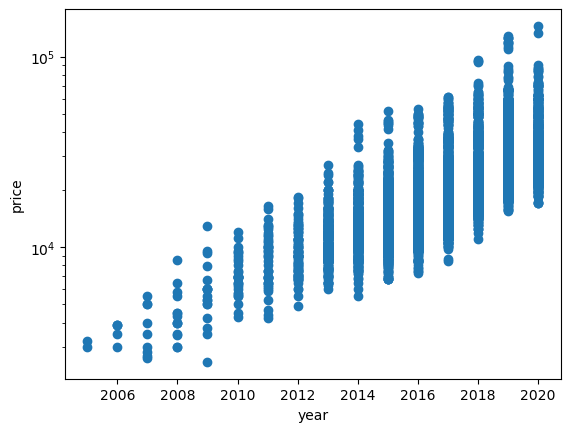

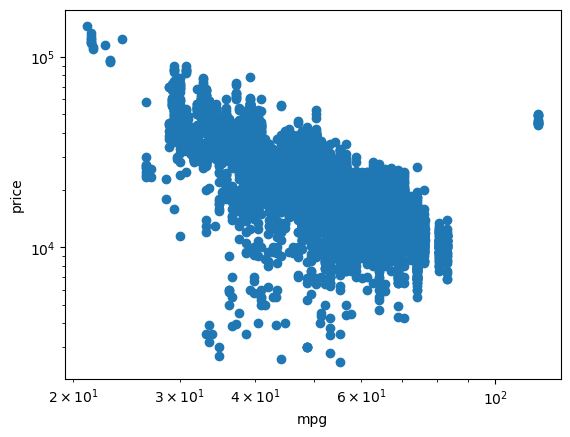

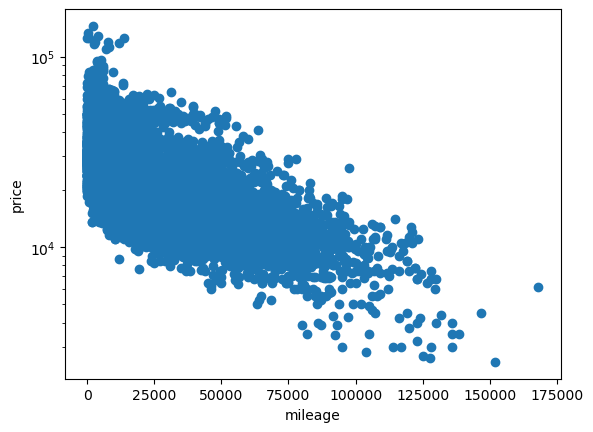

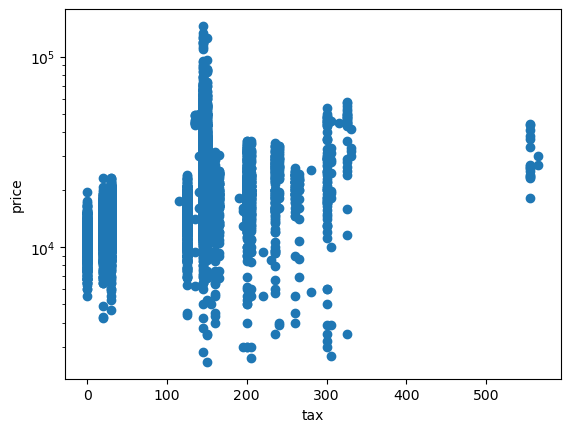

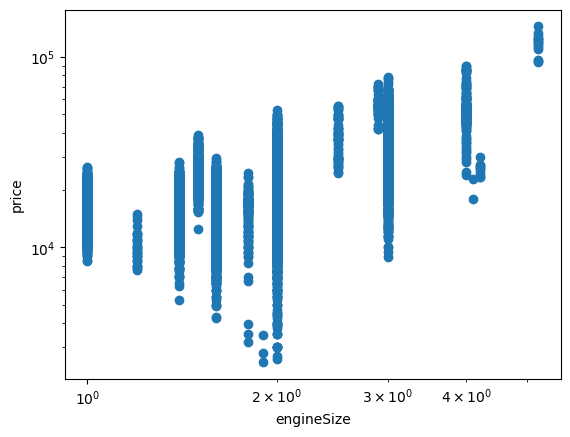

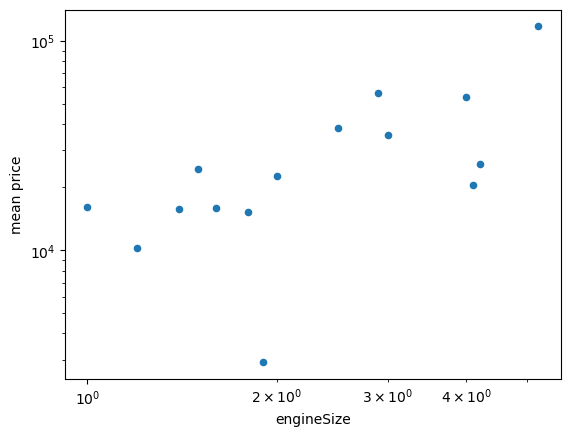

In [175]:
# try to apply log transformation. As it does not depend on ANY parameter, it can be applied to both the training and test set.
plt.scatter(df_audi_no_outliers['year'],df_audi_no_outliers['price'])
plt.xlabel('year')
plt.ylabel('price')
plt.yscale('log')
plt.show()

plt.scatter(df_audi_no_outliers['mpg'],df_audi_no_outliers['price'])
plt.xlabel('mpg')
plt.ylabel('price')
plt.yscale('log')
plt.xscale('log')
plt.show()

plt.scatter(df_audi_no_outliers['mileage'],df_audi_no_outliers['price'])
plt.xlabel('mileage')
plt.ylabel('price')
plt.yscale('log')
plt.show()

plt.scatter(df_audi_no_outliers['tax'],df_audi_no_outliers['price'])
plt.xlabel('tax')
plt.ylabel('price')
plt.yscale('log')
plt.show()

plt.scatter(df_audi_no_outliers['engineSize'],df_audi_no_outliers['price'])
plt.xlabel('engineSize')
plt.ylabel('price')
plt.yscale('log')
plt.xscale('log')
plt.show()

df_audi_no_outliers[['engineSize','price']].groupby('engineSize').mean().reset_index().plot(kind='scatter',x='engineSize',y='price')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('engineSize')
plt.ylabel('mean price')
plt.show()

In [176]:
to_log=['price','mpg','engineSize']
no_log=['mileage','tax','year']

for var in to_log:
  df_audi_no_outliers[f'log_{var}']=np.log(df_audi_no_outliers[var])

/var/folders/81/kn1rwxy912vgf5sqnk7n_zd80000gn/T/ipykernel_27831/3271816725.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_audi_no_outliers[f'log_{var}']=np.log(df_audi_no_outliers[var])
/var/folders/81/kn1rwxy912vgf5sqnk7n_zd80000gn/T/ipykernel_27831/3271816725.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_audi_no_outliers[f'log_{var}']=np.log(df_audi_no_outliers[var])
/var/folders/81/kn1rwxy912vgf5sqnk7n_zd80000gn/T/ipykernel_27831/3271816725.py:5: SettingWithCopyWarning: 
A value is tryi

In [178]:
## We now take care of the categorical variables. First of all we inspect their content.
## Afterward, we apply dummifiaction to make them suitable for regression model.
## drop first is needed to avoid collinearity in regression:
## if there is a significant dependency or association between the independent variables, you may end with vanishing gradient problems

df_audi_no_outliers['fuelType'].value_counts()

fuelType
Diesel    5539
Petrol    4970
Hybrid      12
Name: count, dtype: int64

In [179]:
df_audi_no_outliers['transmission'].value_counts()

transmission
Manual       4326
Semi-Auto    3567
Automatic    2628
Name: count, dtype: int64

In [180]:
df_audi_no_outliers = pd.get_dummies(df_audi_no_outliers,columns=["fuelType"],drop_first=True,dtype='i',)
df_audi_no_outliers = pd.get_dummies(df_audi_no_outliers,columns=["transmission"],drop_first=True,dtype='i')

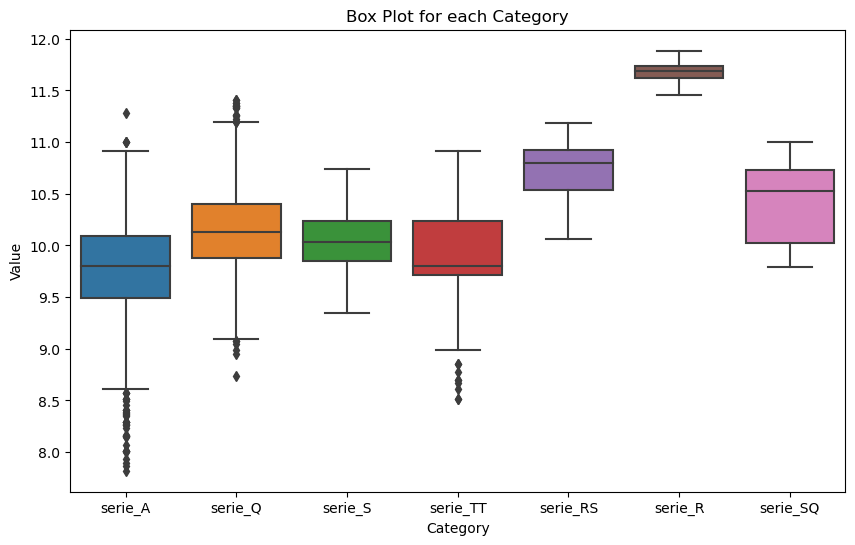

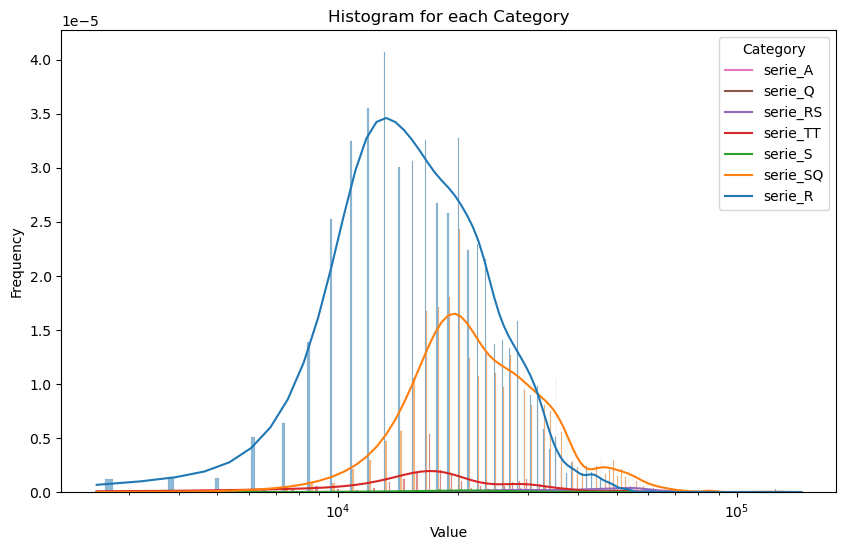

In [183]:
## Feature creation: models may be too many, try using the series
# Initialize all series to 0
df_audi_no_outliers[['serie_A', 'serie_Q', 'serie_RS', 'serie_TT', 'serie_S', 'serie_SQ', 'serie_R']] = 0

# Set corresponding series to 1 based on model content
df_audi_no_outliers[['serie_A', 'serie_Q', 'serie_RS', 'serie_TT', 'serie_S', 'serie_SQ', 'serie_R']]=0
df_audi_no_outliers.loc[df_audi_no_outliers['model'].str.contains('A'),'serie_A']=1
df_audi_no_outliers.loc[df_audi_no_outliers['model'].str.contains('RS'),'serie_RS']=1
df_audi_no_outliers.loc[df_audi_no_outliers['model'].str.contains('TT'),'serie_TT']=1
df_audi_no_outliers.loc[df_audi_no_outliers['model'].str.contains('SQ'),'serie_SQ']=1
df_audi_no_outliers.loc[df_audi_no_outliers['model'].str.contains('Q') & (~ df_audi_no_outliers['model'].str.contains('SQ')),'serie_Q']=1
df_audi_no_outliers.loc[df_audi_no_outliers['model'].str.contains('S') & (~ df_audi_no_outliers['model'].str.contains('SQ')) & (~ df_audi_no_outliers['model'].str.contains('RS')),'serie_S']=1
df_audi_no_outliers.loc[df_audi['model'].str.contains('R') & (~ df_audi_no_outliers['model'].str.contains('RS')),'serie_R']=1


## Are the series meaningful? Plot differences via box plot.
## MIND not all points are real outliers!!!

import seaborn as sns
# Get the column name where the value is 1
result = df_audi_no_outliers[['serie_A', 'serie_Q', 'serie_RS', 'serie_TT', 'serie_S', 'serie_SQ', 'serie_R']].idxmax(axis=1)
# Create a new DataFrame with the result
result_df = pd.DataFrame({'serie': result})


plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.boxplot(data=pd.concat([result_df,df_audi_no_outliers['log_price']],axis=1), x='serie', y='log_price')
plt.title('Box Plot for each Category')
plt.xlabel('Category')
plt.ylabel('Value')
plt.show()


plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.histplot(data=pd.concat([result_df,df_audi_no_outliers['price']],axis=1), x='price', hue='serie', multiple='dodge', shrink=0.8, kde=True, stat='density')
plt.title('Histogram for each Category')
plt.legend(['serie_A', 'serie_Q', 'serie_RS', 'serie_TT', 'serie_S', 'serie_SQ', 'serie_R'],title='Category', loc='upper right')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xscale('log')
plt.show()

In [184]:
binary_vars=['serie_A', 'serie_Q', 'serie_RS', 'serie_TT', 'serie_S', 'serie_SQ',
       'serie_R', 'fuelType_Hybrid', 'fuelType_Petrol', 'transmission_Manual',
       'transmission_Semi-Auto']


In [185]:
## First of all, let us consider the correlation with the target. We need to use point
## biserial method so to compare binary variables with the continuous target
## ARBITRARY: variables that correlate very poorly may be dropped: I choose a threshold of 0.3

from scipy.stats import pointbiserialr
threshold=0.3
binary_for_regressions=[]

for attribute in binary_vars:
  r,p_value=pointbiserialr(df_audi_no_outliers['price'], df_audi_no_outliers[attribute])
  if p_value<0.05:
    print(f'Result of the test is meaningful. Correlation between PRICE and {attribute}: {r}')
    if np.abs(r)>0.3:
      binary_for_regressions.append(attribute)
  else:
    print(f'We cannot say anything about the correlation between PRICE and {attribute}')

Result of the test is meaningful. Correlation between PRICE and serie_A: -0.38041345897274015
Result of the test is meaningful. Correlation between PRICE and serie_Q: 0.31100054952182676
Result of the test is meaningful. Correlation between PRICE and serie_RS: 0.23214678541066078
We cannot say anything about the correlation between PRICE and serie_TT
We cannot say anything about the correlation between PRICE and serie_S
Result of the test is meaningful. Correlation between PRICE and serie_SQ: 0.05291502785470413
Result of the test is meaningful. Correlation between PRICE and serie_R: 0.3149082031733868
Result of the test is meaningful. Correlation between PRICE and fuelType_Hybrid: 0.07061809315877712
Result of the test is meaningful. Correlation between PRICE and fuelType_Petrol: -0.044700512609045465
Result of the test is meaningful. Correlation between PRICE and transmission_Manual: -0.4928907050400681
Result of the test is meaningful. Correlation between PRICE and transmission_Semi

In [186]:
# Variables which survived
binary_for_regressions

['serie_A', 'serie_Q', 'serie_R', 'transmission_Manual']

In [187]:
from sklearn.model_selection import train_test_split

# let us now define features and target variables and split the dataset into a training and test set
# this should be done in a stratified fashion, but we can ignore this requirement for this course
target='log_price'
features=binary_for_regressions+[f'log_{var}' for var in to_log]+no_log
features.remove(target)
data_for_regression=df_audi_no_outliers[features+[target]]


data_train, data_test = train_test_split(data_for_regression, test_size=0.3, random_state=0)

In [188]:
#we now apply the Robust Scaler, this should be calibrated on the TRAINING SET ONLY
# the same transformation without fit should be also applied to the test set for consistency
from sklearn.preprocessing import RobustScaler
to_rescale=[f'log_{var}' for var in to_log]+no_log

scaler = RobustScaler()
transformed_data_train=data_train.copy()
transformed_data_train[to_rescale] = scaler.fit_transform(data_train[to_rescale])

transformed_data_test=data_test.copy()
transformed_data_test[to_rescale] = scaler.transform(data_test[to_rescale])

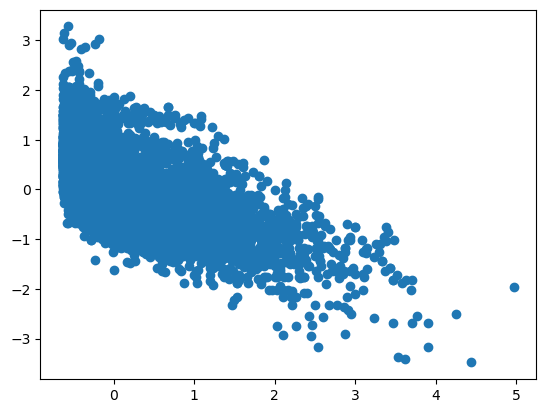

In [189]:
# linear relation is not spoiled by the rescaling
plt.scatter(transformed_data_train['mileage'],transformed_data_train['log_price'])

In [190]:
# Define independent variable set (X) and target variable (y) to be used in the linear regression
X_train=transformed_data_train[features]
y_train=transformed_data_train[target]

X_test=transformed_data_test[features]
y_test=transformed_data_test[target]

In [191]:
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression


lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

MAE=mean_absolute_error(y_test,y_pred)
print(f'The Mean Absolute Error of the regression is {MAE}.')
print(f'The R2 coefficient of the regression is {r2_score(y_test,y_pred)}.')

The Mean Absolute Error of the regression is 0.18282895275953653.
The R2 coefficient of the regression is 0.9089971554497798.


### Quality of the Linear Regression Analysis

The coefficient of determination (R-squared) measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s). It provides a measure of how well the regression model fits the observed data points.

1. **Coefficient of Determination (R-squared):**
   $$ R^2 = 1 - \frac{SS_{\text{res}}}{SS_{\text{tot}}}$$

   Where:
   - $SS_{\text{res}}$ is the sum of squares of residuals
   - $ SS_{\text{tot}}$ is the total sum of squares

2. **Sum of Squares of Residuals (\(SS_{\text{res}}\)):**
   $$SS_{\text{res}} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

   Where:
   - $n$ is the number of observations
   - $y_i$ is the observed value of the dependent variable
   - $\hat{y}_i$ is the predicted value of the dependent variable

3. **Total Sum of Squares $SS_{\text{tot}}$:**
   $$ SS_{\text{tot}} = \sum_{i=1}^{n} (y_i - \bar{y})^2 $$

   Where:
   - $n$ is the number of observations
   - $y_i$ is the observed value of the dependent variable
   - $\bar{y}$ is the mean of the observed values of the dependent variable

Excercise:
* Outlier detection using LOF provided more meaningful results than DBSCAN. Nevertheless, we were in a situation where points had different densities in different directions. Try using log transformation were needed before applying the robust scaler and see whether results make more sense.

* Try avoid using variable rescaling/transformation before applying linear regression. How do the performance metric change?

* What is the actual error on the price prediction: invert scaling using scaler.inverse_transform(data_to_scale_back) and then compute the exponential. You need to apply the inverse transformation on the test set and on the prediction, to get a fair idea of the actual price MAE.

In [208]:
## Compute the price associated to prediction
predicted_df=transformed_data_test[to_rescale].copy()
predicted_df['log_price']=y_pred
predicted_df[to_rescale]=scaler.inverse_transform(predicted_df[to_rescale])
predicted_df['price']=np.exp(predicted_df['log_price'])

## Compute the price associated to prediction
true_price=np.exp(data_test['log_price'])

relative_MAE=mean_absolute_error(true_price,predicted_df['price'])

print(f'The relative MAE in predicting used car price is: {round(MAE*100,2)}%')



The relative MAE in predicting used car price is: 18.28%


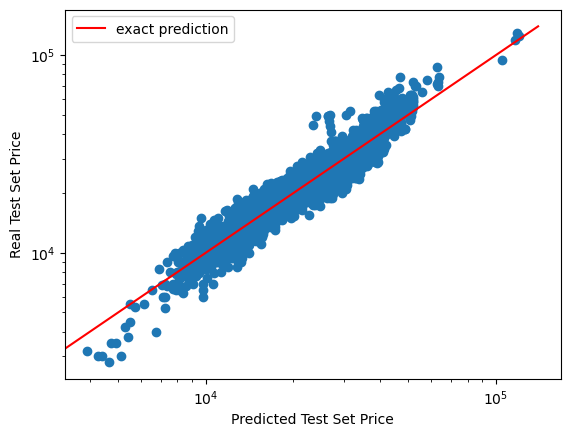

In [209]:
plt.scatter(predicted_df['price'],true_price)
plt.ylabel('Real Test Set Price')
plt.xlabel('Predicted Test Set Price')
plt.xscale('log')
plt.yscale('log')
plt.plot(np.linspace(0,140000,30),np.linspace(0,140000,30),color='red', label='exact prediction')
plt.legend()
plt.show()